In [1302]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import shutil
import os
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [1303]:
zip_file_path = "C:/Users/Sarangi Perera/ML CW/adult.zip"
extract_folder_path = "C:/Users/Sarangi Perera/ML CW/adult"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

print(f"Zip folder '{zip_file_path}' has been successfully extracted to '{extract_folder_path}'.")

Zip folder 'C:/Users/Sarangi Perera/ML CW/adult.zip' has been successfully extracted to 'C:/Users/Sarangi Perera/ML CW/adult'.


In [1304]:
data_file_path = "C:/Users/Sarangi Perera/ML CW/adult/adult.data"
test_data_file_path = "C:/Users/Sarangi Perera/ML CW/adult/adult.test"

df_data = pd.read_csv(data_file_path, header=None, skipinitialspace=True)
df_test_data = pd.read_csv(test_data_file_path, header=None, skipinitialspace=True, skiprows=1)  # Skip the first row in the test file

column_names = ["Age", "Work_Class", "fnlwgt", "Education", "Education_Num", "Marital_Status","Occupation", "Relationship", "Race","Sex","Capital_Gain","Capital_Loss","Hours_per_Week","Native_Country","Income"]  # Replace with actual column names

df_data = pd.read_csv(data_file_path, header=None, skipinitialspace=True, names=column_names, na_values="?")
df_test_data = pd.read_csv(test_data_file_path, header=None, skipinitialspace=True, skiprows=1, names=column_names, na_values="?")
combined_dataframe = pd.concat([df_data, df_test_data], axis=0)

combined_csv_path = "C:/Users/Sarangi Perera/ML CW/adult/combined_data.csv"
combined_dataframe.to_csv(combined_csv_path, index=False)

print(f"Data from '{data_file_path}' and '{test_data_file_path}' have been combined and saved to '{combined_csv_path}'.")

Data from 'C:/Users/Sarangi Perera/ML CW/adult/adult.data' and 'C:/Users/Sarangi Perera/ML CW/adult/adult.test' have been combined and saved to 'C:/Users/Sarangi Perera/ML CW/adult/combined_data.csv'.


In [1305]:
data = pd.read_csv("C:/Users/Sarangi Perera/ML CW/adult/combined_data.csv")
data

,Age,Work_Class,fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [1306]:
data.shape

(48842, 15)

In [1307]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   Work_Class      46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   Education       48842 non-null  object
 4   Education_Num   48842 non-null  int64 
 5   Marital_Status  48842 non-null  object
 6   Occupation      46033 non-null  object
 7   Relationship    48842 non-null  object
 8   Race            48842 non-null  object
 9   Sex             48842 non-null  object
 10  Capital_Gain    48842 non-null  int64 
 11  Capital_Loss    48842 non-null  int64 
 12  Hours_per_Week  48842 non-null  int64 
 13  Native_Country  47985 non-null  object
 14  Income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [1308]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>



# Handling Null Values

In [1309]:
data.isnull().sum()

Age                  0
Work_Class        2799
fnlwgt               0
Education            0
Education_Num        0
Marital_Status       0
Occupation        2809
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours_per_Week       0
Native_Country     857
Income               0
dtype: int64

In [1310]:
data['Work_Class'].fillna(method='ffill', inplace=True)
data['Occupation'].fillna(method='ffill', inplace=True)
data['Native_Country'].fillna(method='ffill', inplace=True)

In [1311]:
data.isnull().sum()

Age               0
Work_Class        0
fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_per_Week    0
Native_Country    0
Income            0
dtype: int64

# Feature Distribution

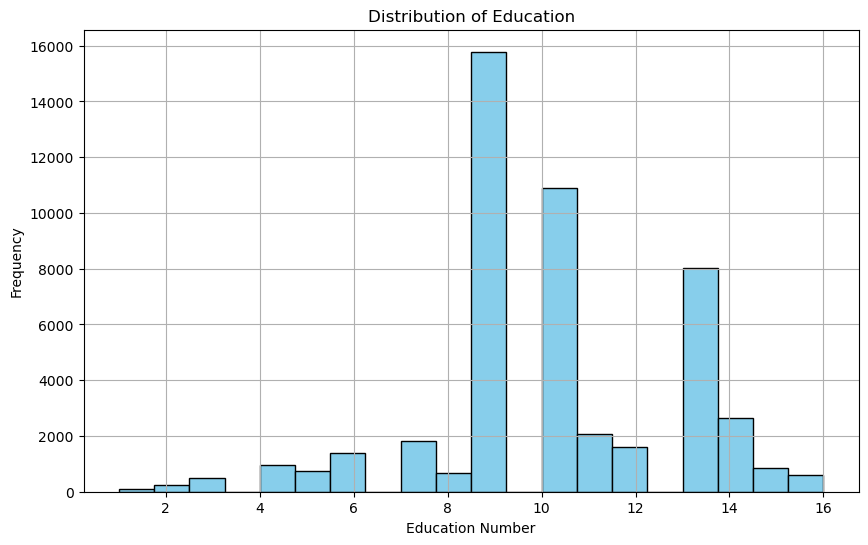

In [1312]:
plt.figure(figsize=(10, 6))
plt.hist(data['Education_Num'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Education Number')
plt.ylabel('Frequency')
plt.title('Distribution of Education')
plt.grid(True)
plt.show()

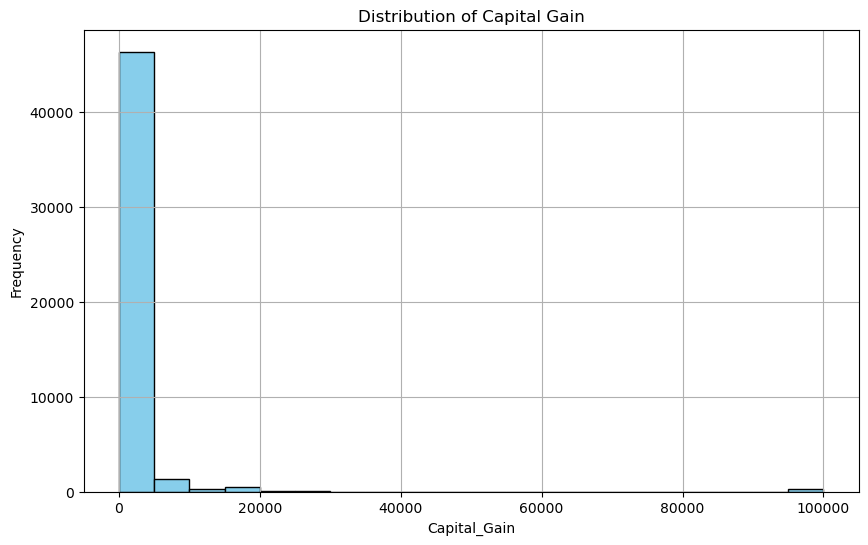

In [1313]:
plt.figure(figsize=(10, 6))
plt.hist(data['Capital_Gain'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Capital_Gain')
plt.ylabel('Frequency')
plt.title('Distribution of Capital Gain')
plt.grid(True)
plt.show()

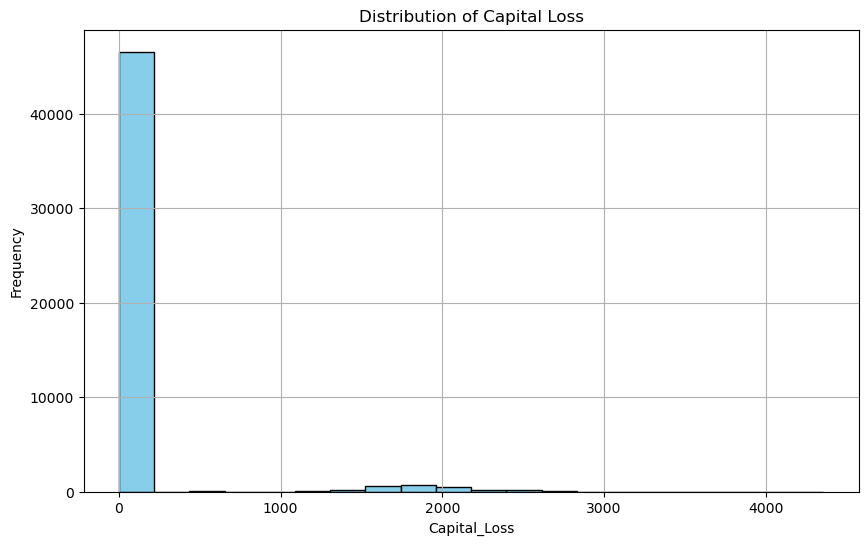

In [1314]:
plt.figure(figsize=(10, 6))
plt.hist(data['Capital_Loss'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Capital_Loss')
plt.ylabel('Frequency')
plt.title('Distribution of Capital Loss')
plt.grid(True)
plt.show()

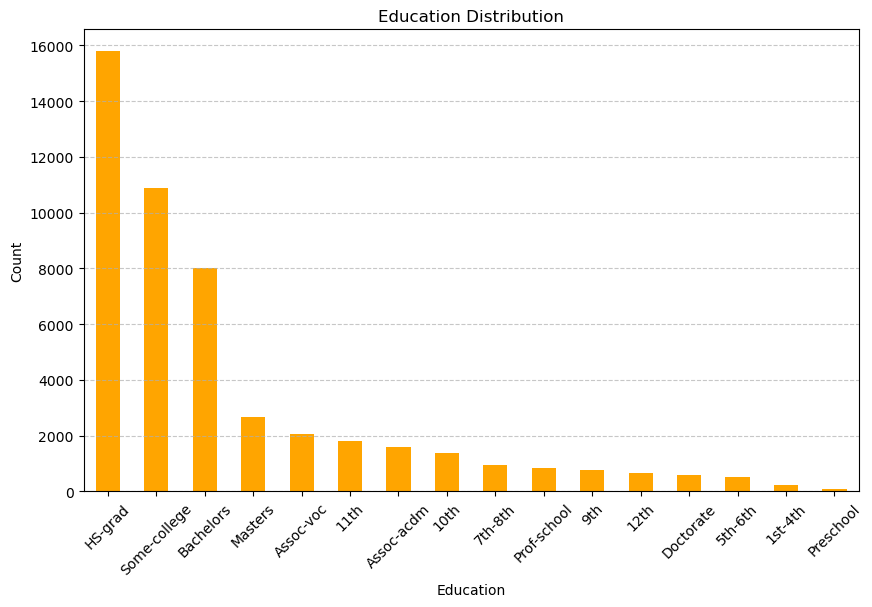

In [1315]:
education_counts = data['Education'].value_counts()
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar', color='orange')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Distribution')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

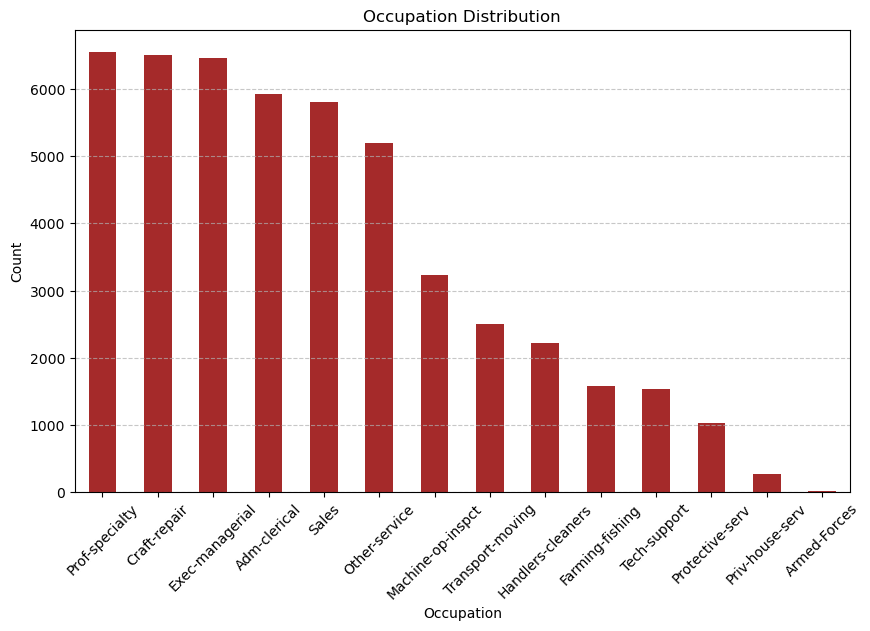

In [1316]:
education_counts = data['Occupation'].value_counts()
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar', color='brown')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation Distribution')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

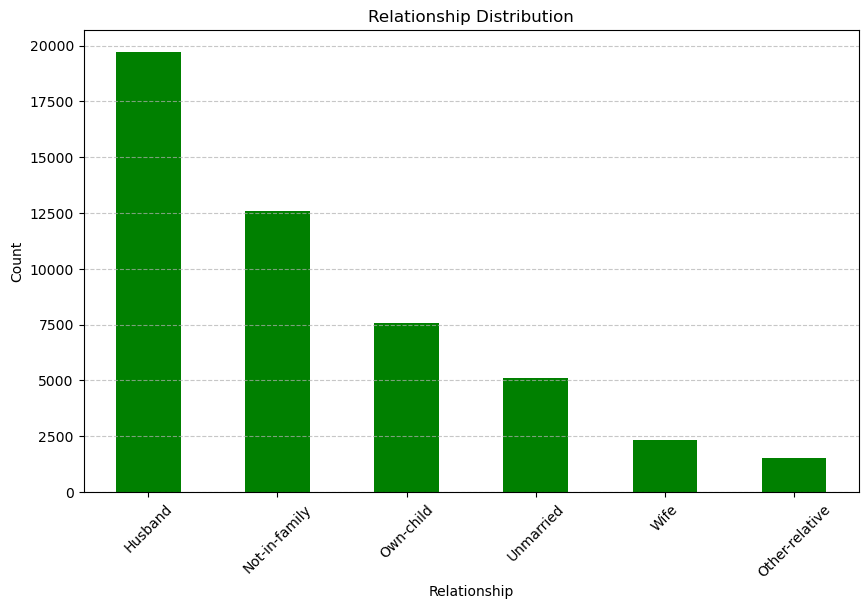

In [1317]:
education_counts = data['Relationship'].value_counts()
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar', color='green')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.title('Relationship Distribution')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

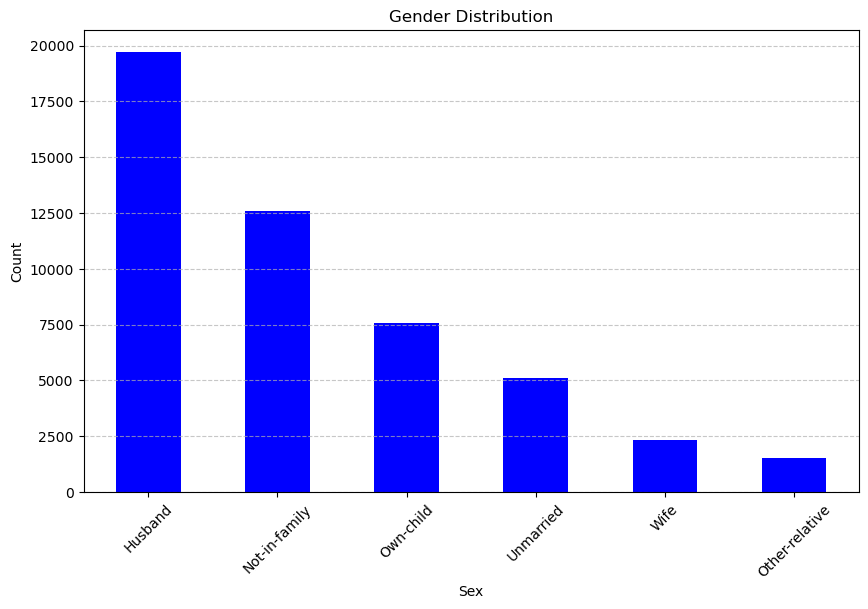

In [1318]:
gender_counts = data['Sex'].value_counts()
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar', color='blue')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

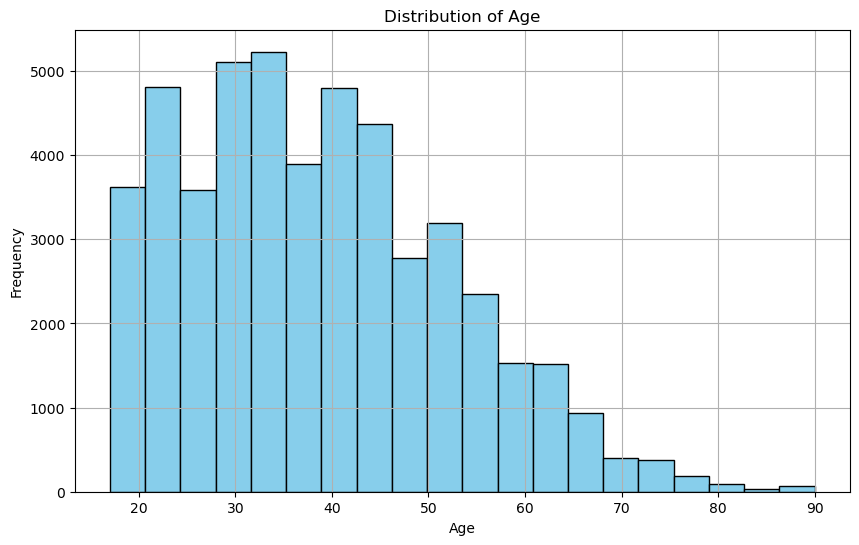

In [1319]:
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid(True)
plt.show()

# Handling Outliers In Age

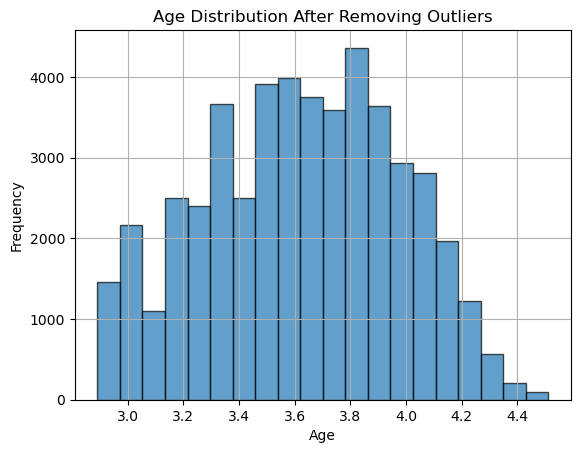

In [1320]:
data['Age'] = np.log1p(data['Age'])

plt.hist(data['Age'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution After Removing Outliers')
plt.grid(True)
plt.show()

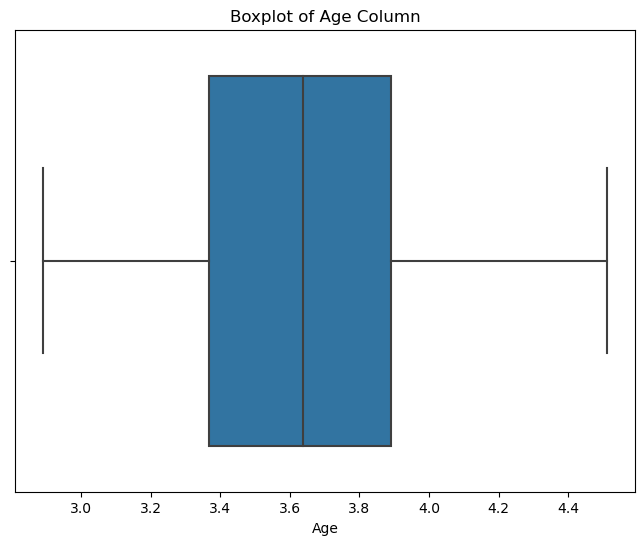

In [1321]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Age'])
plt.title('Boxplot of Age Column')
plt.xlabel('Age')
plt.show()

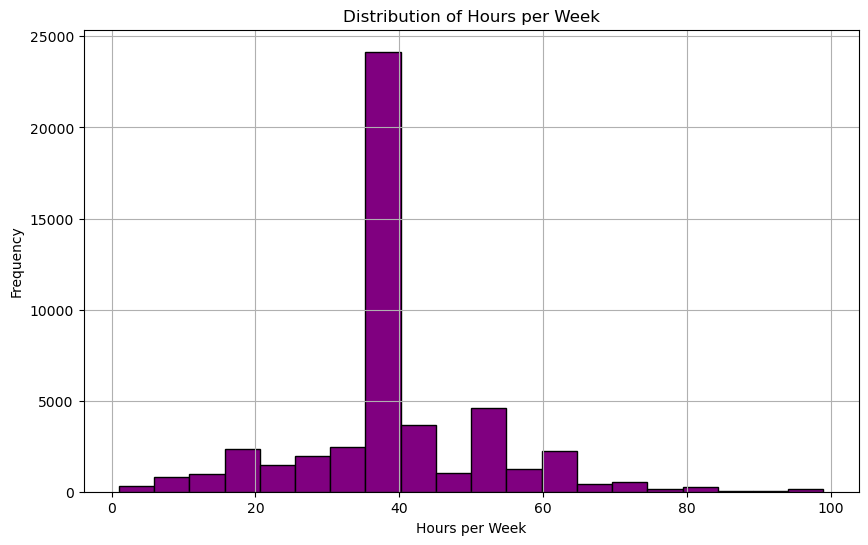

In [1322]:
plt.figure(figsize=(10, 6))
plt.hist(data['Hours_per_Week'], bins=20, color='purple', edgecolor='black')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.title('Distribution of Hours per Week')
plt.grid(True)
plt.show()

# Handling Outliers In Hours per week

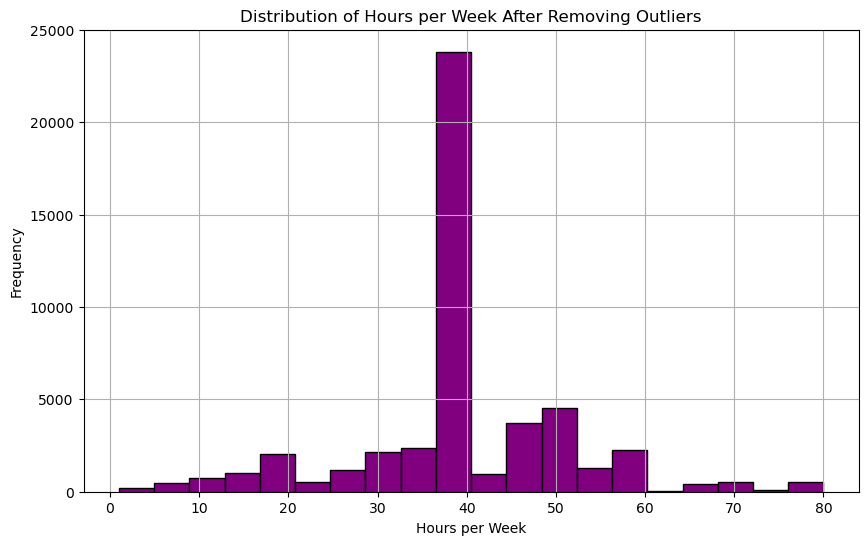

In [1323]:
threshold = 80

percentile_95 = np.percentile(data['Hours_per_Week'], 95)
data['Hours_per_Week'] = np.where(data['Hours_per_Week'] > threshold, threshold, data['Hours_per_Week'])
plt.figure(figsize=(10, 6))
plt.hist(data['Hours_per_Week'], bins=20, color='purple', edgecolor='black')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.title('Distribution of Hours per Week After Removing Outliers')
plt.grid(True)
plt.show()

# Handling Redundancy

In [1325]:
data.drop_duplicates(inplace=True)

In [1326]:
columns_to_remove = ['Education']
data.drop(columns=columns_to_remove, inplace=True)

In [1327]:
data

,Age,Work_Class,fnlwgt,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,3.688879,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,3.931826,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3.663562,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3.988984,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,3.367296,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,3.688879,Private,215419,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,4.174387,Private,321403,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,3.663562,Private,374983,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,3.806662,Private,83891,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [1328]:
data

,Age,Work_Class,fnlwgt,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,3.688879,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,3.931826,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3.663562,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3.988984,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,3.367296,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,3.688879,Private,215419,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,4.174387,Private,321403,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,3.663562,Private,374983,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,3.806662,Private,83891,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


# Value Counts Of The Features

In [1329]:
print(data.columns)


Index(['Age', 'Work_Class', 'fnlwgt', 'Education_Num', 'Marital_Status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain',
       'Capital_Loss', 'Hours_per_Week', 'Native_Country', 'Income'],
      dtype='object')


In [1330]:
data.Age.value_counts()

Age
3.610918    1348
3.583519    1336
3.526361    1335
3.178054    1328
3.465736    1325
            ... 
4.488636       6
4.454347       5
4.477337       3
4.499810       2
4.465908       1
Name: count, Length: 74, dtype: int64

In [1331]:
data.Occupation.value_counts()

Occupation
Prof-specialty       6552
Craft-repair         6505
Exec-managerial      6457
Adm-clerical         5932
Sales                5813
Other-service        5198
Machine-op-inspct    3223
Transport-moving     2507
Handlers-cleaners    2222
Farming-fishing      1567
Tech-support         1530
Protective-serv      1031
Priv-house-serv       259
Armed-Forces           17
Name: count, dtype: int64

In [1332]:
data.Work_Class.value_counts()

Work_Class
Private             35996
Self-emp-not-inc     4083
Local-gov            3301
State-gov            2096
Self-emp-inc         1792
Federal-gov          1511
Without-pay            24
Never-worked           10
Name: count, dtype: int64

In [1333]:
data.Relationship.value_counts()

Relationship
Husband           19709
Not-in-family     12567
Own-child          7576
Unmarried          5124
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [1334]:
data.Marital_Status.value_counts()

Marital_Status
Married-civ-spouse       22372
Never-married            16098
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [1335]:
data.Native_Country.value_counts()

Native_Country
United-States                 44588
Mexico                          965
Philippines                     298
Germany                         211
Puerto-Rico                     188
Canada                          185
El-Salvador                     161
India                           156
Cuba                            140
England                         130
China                           125
South                           115
Jamaica                         108
Dominican-Republic              107
Italy                           106
Japan                            93
Vietnam                          91
Guatemala                        88
Columbia                         87
Poland                           87
Haiti                            76
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           50
Nicaragua                        49
Peru                             48
Ecuador      

In [1336]:
data.Race.value_counts()

Race
White                 41736
Black                  4683
Asian-Pac-Islander     1518
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [1337]:
data.Education_Num.value_counts()

Education_Num
9     15777
10    10869
13     8020
14     2656
11     2060
7      1812
12     1601
6      1389
4       954
15      834
5       756
8       656
16      594
3       508
2       245
1        82
Name: count, dtype: int64

In [1338]:
data.Income.value_counts()

Income
<=50K     24698
<=50K.    12430
>50K       7839
>50K.      3846
Name: count, dtype: int64

# Handling Structural Error in Income

In [1339]:
data.Income.unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [1340]:
data['Income'] = data['Income'].replace({"<=50K.":"<=50K", ">50K.": ">50K"})
data.Income.unique()

array(['<=50K', '>50K'], dtype=object)

# Encoding 

In [1341]:
data=pd.concat([data.drop('Occupation',axis=1), pd.get_dummies(data.Occupation).add_prefix('Occupation')], axis=1)
data=pd.concat([data.drop('Work_Class',axis=1), pd.get_dummies(data.Work_Class).add_prefix('Work_Class')], axis=1)
data=pd.concat([data.drop('Marital_Status',axis=1), pd.get_dummies(data.Marital_Status).add_prefix('Marital_Status')], axis=1)
data=pd.concat([data.drop('Relationship',axis=1), pd.get_dummies(data.Relationship).add_prefix('Relationship')], axis=1)
data=pd.concat([data.drop('Race',axis=1), pd.get_dummies(data.Race).add_prefix('Race')], axis=1)
data=pd.concat([data.drop('Native_Country',axis=1), pd.get_dummies(data.Native_Country).add_prefix('Native_Country')], axis=1)


In [1342]:
data['Sex']=data['Sex'].apply(lambda x: 1 if x == 'Male' else 0)
data['Income']=data['Income'].apply(lambda x: 1 if x == '>50K' else 0)

In [1343]:
target_column = 'Income'
data_encoded = pd.get_dummies(data, columns=[target_column], drop_first=True)


# Visualizing Correlations

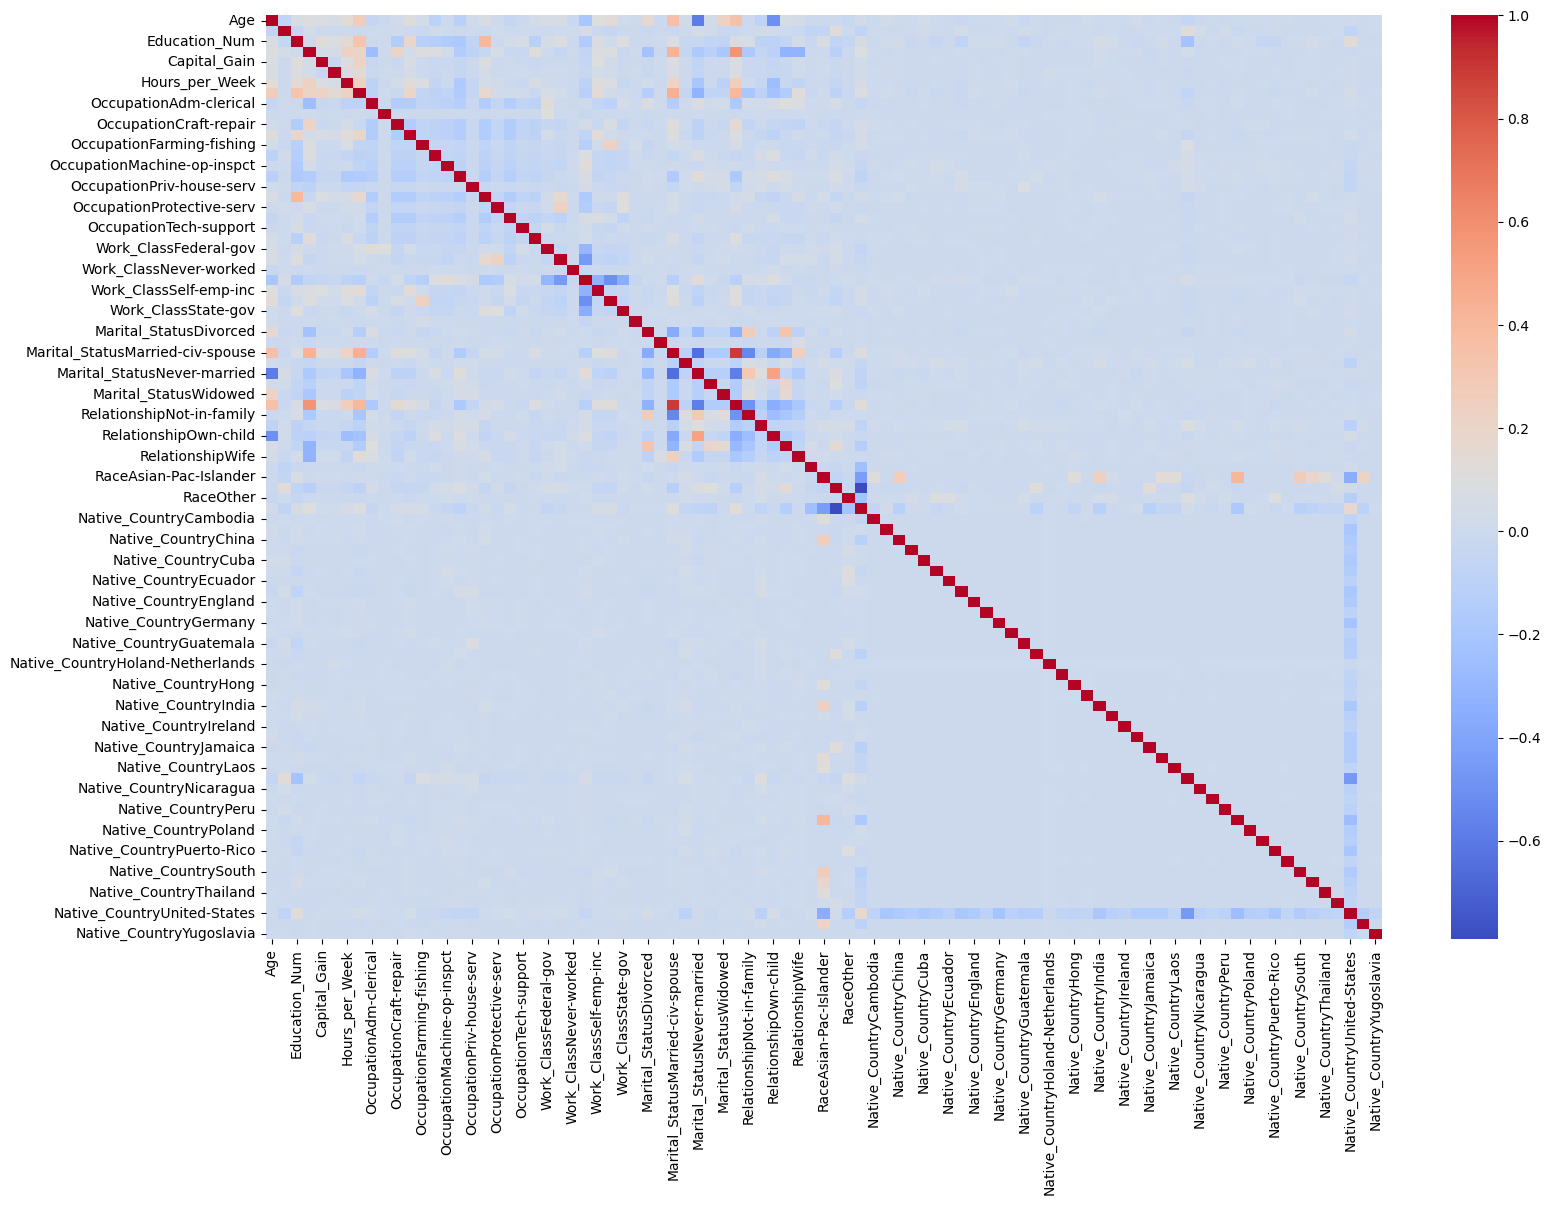

In [1344]:
plt.figure(figsize=(18,12))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.show()

In [1345]:
data.corr()

,Age,fnlwgt,Education_Num,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Income,OccupationAdm-clerical,OccupationArmed-Forces,...,Native_CountryPortugal,Native_CountryPuerto-Rico,Native_CountryScotland,Native_CountrySouth,Native_CountryTaiwan,Native_CountryThailand,Native_CountryTrinadad&Tobago,Native_CountryUnited-States,Native_CountryVietnam,Native_CountryYugoslavia
Age,1.000000,-0.073879,0.069044,0.104506,0.081207,0.062116,0.143592,0.265179,-0.038609,-0.006166,...,0.007553,0.006595,0.011000,-0.002362,-0.009406,-0.000427,0.002630,0.007734,-0.013968,0.002504
fnlwgt,-0.073879,1.000000,-0.038798,0.027848,-0.003713,-0.004375,-0.012752,-0.006376,0.006918,0.002030,...,-0.013582,0.009884,-0.006525,-0.010347,-0.001735,-0.001513,0.004153,-0.074490,-0.006690,0.006181
Education_Num,0.069044,-0.038798,1.000000,0.009284,0.125186,0.080969,0.147813,0.332746,-0.004703,0.005409,...,-0.047853,-0.041152,0.000902,0.012980,0.045438,0.007281,-0.010212,0.125930,-0.005019,-0.003511
Sex,0.104506,0.027848,0.009284,1.000000,0.047106,0.045491,0.232397,0.214649,-0.257520,0.008480,...,0.009652,-0.008906,-0.002179,-0.005275,0.003041,-0.007120,-0.009345,-0.008610,0.000169,0.006324
Capital_Gain,0.081207,-0.003713,0.125186,0.047106,1.000000,-0.031460,0.084163,0.223014,-0.029967,-0.000496,...,-0.004358,-0.006269,-0.002319,0.003902,0.004256,-0.002783,-0.003041,0.009344,-0.002946,-0.000719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Native_CountryThailand,-0.000427,-0.001513,0.007281,-0.007120,-0.002783,-0.002341,0.008954,-0.004226,-0.001634,-0.000463,...,-0.000919,-0.001542,-0.000514,-0.001205,-0.000906,1.000000,-0.000583,-0.080560,-0.001072,-0.000561
Native_CountryTrinadad&Tobago,0.002630,0.004153,-0.010212,-0.009345,-0.003041,0.004025,-0.002833,-0.009114,0.007250,-0.000439,...,-0.000872,-0.001463,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.076424,-0.001017,-0.000533
Native_CountryUnited-States,0.007734,-0.074490,0.125930,-0.008610,0.009344,0.011525,0.007478,0.037460,0.018830,0.005746,...,-0.120438,-0.201997,-0.067396,-0.157866,-0.118624,-0.080560,-0.076424,1.000000,-0.140396,-0.073538
Native_CountryVietnam,-0.013968,-0.006690,-0.005019,0.000169,-0.002946,-0.000636,-0.008073,-0.014228,0.010089,-0.000807,...,-0.001602,-0.002687,-0.000897,-0.002100,-0.001578,-0.001072,-0.001017,-0.140396,1.000000,-0.000978


# Feature Selection

In [1346]:
correlations = data.corr()['Income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(data.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
data_dropped = data.drop(cols_to_drop, axis=1)

In [1347]:
data_dropped

,Age,Education_Num,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Income,OccupationExec-managerial,OccupationOther-service,OccupationProf-specialty,Work_ClassSelf-emp-inc,Marital_StatusDivorced,Marital_StatusMarried-civ-spouse,Marital_StatusNever-married,RelationshipHusband,RelationshipNot-in-family,RelationshipOwn-child,RelationshipUnmarried
0,3.688879,13,1,2174,0,40,0,False,False,False,False,False,False,True,False,True,False,False
1,3.931826,13,1,0,0,13,0,True,False,False,False,False,True,False,True,False,False,False
2,3.663562,9,1,0,0,40,0,False,False,False,False,True,False,False,False,True,False,False
3,3.988984,7,1,0,0,40,0,False,False,False,False,False,True,False,True,False,False,False
4,3.367296,13,0,0,0,40,0,False,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,3.688879,13,0,0,0,36,0,False,False,True,False,True,False,False,False,True,False,False
48838,4.174387,9,1,0,0,40,0,False,False,True,False,False,False,False,False,False,False,False
48839,3.663562,13,1,0,0,50,0,False,False,True,False,False,True,False,True,False,False,False
48840,3.806662,13,1,5455,0,40,0,False,False,False,False,True,False,False,False,False,True,False


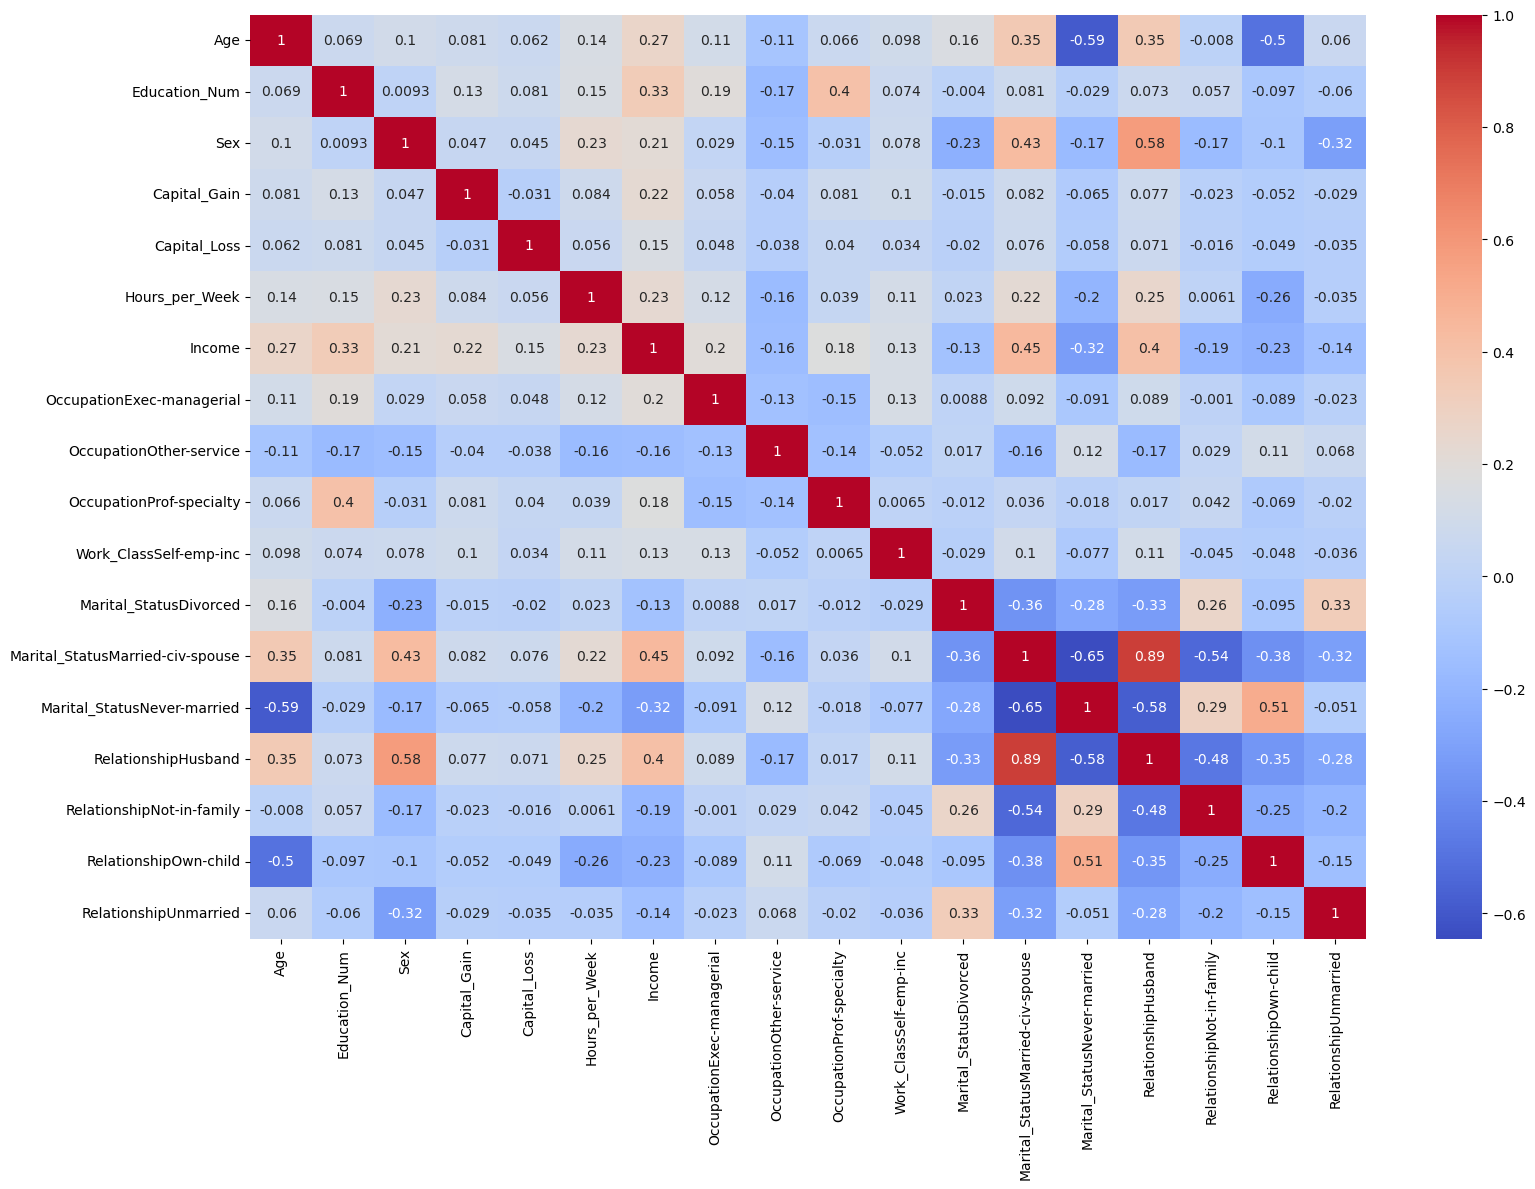

In [1348]:
plt.figure(figsize=(18,12))
sns.heatmap(data_dropped.corr(), annot=True, cmap='coolwarm')
plt.show()

# Splitting Training & Testing Data

In [1349]:
X = data_dropped.drop('Income', axis=1)
y = data_dropped['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (39050, 17)
X_test shape: (9763, 17)
y_train shape: (39050,)
y_test shape: (9763,)


# Random Forest Model Fitting (Before Parameter Tuning)

In [1350]:
rf_classifier=RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

# Random Forest Testing Accuracy (Before Parameter Tuning)

In [1351]:
rf_classifier.score(X_test, y_test)

0.8426713100481409

# Parameter Tuning

In [1352]:
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {
     'n_estimators': [100, 200, 300,350,400,450,500],
     'max_depth': [None, 10, 20,25,30,35],
     'min_samples_split': [2, 5, 10,12,15,17,20],
     'min_samples_leaf': [1, 2, 4,5,6,8,10],
     'max_features': ['auto', 'sqrt', 'log2', None],
     'bootstrap': [True, False],                  
     'criterion': ['gini', 'entropy']  
}

random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_distributions, 
                                   n_iter=10, scoring='recall', verbose=5, random_state=42)



In [1353]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=350;, score=0.607 total time=  10.3s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=350;, score=0.614 total time=  10.2s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=350;, score=0.606 total time=  10.6s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=350;, score=0.606 total time=  11.1s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=35, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=350;, score=0.606 total time=  10.2s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=None, max_features=

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 25, 30, 35],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 5, 6, 8,
                                                             10],
                                        'min_samples_split': [2, 5, 10, 12, 15,
                                                              17, 20],
                                        'n_estimators': [100, 200, 300, 350,
                                                         400, 450, 500]},
                   random_state=42, scoring='recall', verbose=5)

In [1354]:
random_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=35, max_features='log2',
                       min_samples_split=10, n_estimators=350)

# Random Forest Model Fitting & Evaluation (After Parameter Tuning)

In [1355]:
rf_classifier = random_search.best_estimator_

In [1356]:
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
y2_pred =rf_classifier.predict(X_train)
train_accuracy= accuracy_score(y_train, y2_pred)

print("Test Accuracy:", test_accuracy)
print("Train Accuracy:", train_accuracy)


Test Accuracy: 0.8533237734302981
Train Accuracy: 0.905326504481434


In [1357]:
rf_classifier_predictions = rf_classifier.predict(X_test)
precision = precision_score(y_test, rf_classifier_predictions)
recall = recall_score(y_test, rf_classifier_predictions)
f1 = f1_score(y_test, rf_classifier_predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.7481827622014537
Recall: 0.6034338358458962
F1-Score: 0.6680574872508114


In [1358]:
report = classification_report(y_test, rf_classifier_predictions)
print("Random Forest Classification Report:\n", report)

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      7375
           1       0.75      0.60      0.67      2388

    accuracy                           0.85      9763
   macro avg       0.81      0.77      0.79      9763
weighted avg       0.85      0.85      0.85      9763



[[6890  485]
 [ 947 1441]]


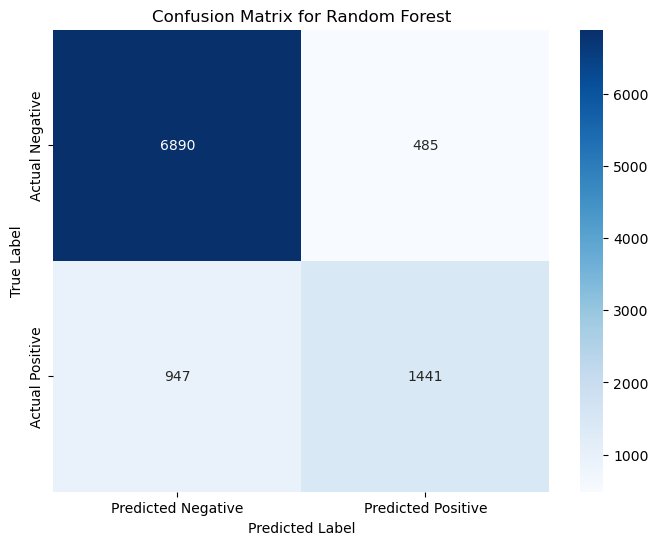

In [1359]:
rf_conf_matrix = confusion_matrix(y_test, rf_classifier_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
print(rf_conf_matrix)
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


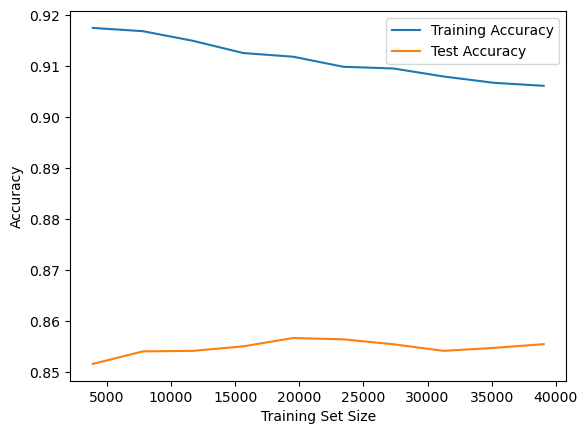

In [1360]:
train_sizes, train_scores, test_scores = learning_curve(rf_classifier, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Naive Bayes Model Fitting & Testing Accuracy (Before Parameter Tuning)

In [1361]:
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)

y_pred = gnb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.816859571852914


# Parameter Tuning

In [1362]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
}
random_search = RandomizedSearchCV(estimator=gnb_classifier, param_distributions=param_grid, n_iter=10, random_state=42, cv=5, verbose=2)

random_search.fit(X_train, y_train)
gnb = random_search.best_params_
print("Best Hyperparameters:", gnb) 


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-07; total time=   0.0s
[CV] END ................................var_smoo

# Naive Bayes Model Fitting & Evaluation (After Parameter Tuning)

In [1363]:
best_gnb_classifier = GaussianNB(**gnb)
best_gnb_classifier.fit(X_train, y_train)

train_accuracy = best_gnb_classifier.score(X_train, y_train)
test_accuracy = best_gnb_classifier.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.821920614596671
Testing Accuracy: 0.816859571852914


In [1364]:
predictions = best_gnb_classifier.predict(X_test)

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.6076040172166427
Recall: 0.7093802345058626
F1-Score: 0.6545595054095826


In [1365]:
report = classification_report(y_test, predictions)
print("Naive Bayes Classification Report:\n", report)

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88      7375
           1       0.61      0.71      0.65      2388

    accuracy                           0.82      9763
   macro avg       0.75      0.78      0.76      9763
weighted avg       0.83      0.82      0.82      9763



[[6281 1094]
 [ 694 1694]]


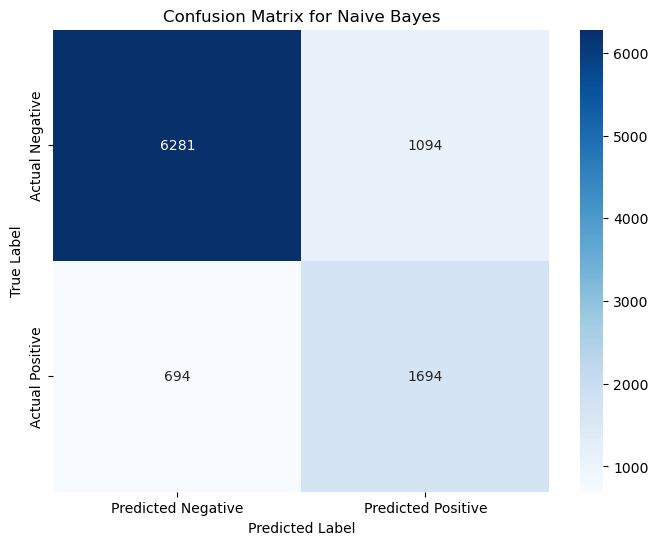

In [1366]:
nb_conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
print(nb_conf_matrix)
plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

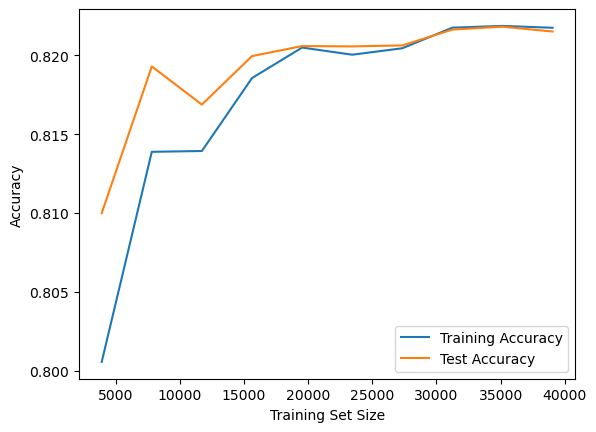

In [1367]:
train_sizes, train_scores, test_scores = learning_curve(best_gnb_classifier, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()